In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-bank-stock-prices/PNB.NS.csv
/kaggle/input/nifty-bank-stock-prices/HDFC.NS.csv
/kaggle/input/nifty-bank-stock-prices/ind_niftybanklist.csv
/kaggle/input/nifty-bank-stock-prices/AXISBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/FEDERALBNK.NS.csv
/kaggle/input/nifty-bank-stock-prices/ICICIBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/SBIN.NS.csv
/kaggle/input/nifty-bank-stock-prices/KOTAKBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/NSEBANK (1).csv
/kaggle/input/nifty-bank-stock-prices/IDFCFIRSTB.NS.csv
/kaggle/input/nifty-bank-stock-prices/BANDHANBNK.NS.csv
/kaggle/input/nifty-bank-stock-prices/AUBANK.NS.csv
/kaggle/input/nifty-bank-stock-prices/INDUSINDBK.NS.csv
/kaggle/input/nifty-bank-stock-prices/RBLBANK.NS.csv
/kaggle/input/stock-market-india/FullData.h5
/kaggle/input/stock-market-india/FullDataCsv/SUNTV__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/MANAPPURAM__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDat

# Overview 
The stock market is very unpredictable, any geopolitical change can impact the share trend of stocks in the share market, recently we have seen how covid-19 has impacted the stock prices, which is why on financial data doing a  reliable trend analysis is very difficult. The most efficient way to solve this kind of issue is with the help of Machine learning and Deep learning. We use Recurrent Neural Networks for time series forecasting of all the banks under Bank Nifty. 


# Time Series Forecasting
Time series data is recorded at regular time intervals, and the order of these data points is important. Therefore, any predictive model based on time series data will have time as an independent variable. The output of a model would be the predicted value or classification at a specific time. We use stock price data over a period of three years as a time series to predict the future price of those shares. 


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install yfinance 
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=73fd1ef2b5e43439c71bcfae6b9821efa1147fa17f4ede5493093f474747a007
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=cd6248124c2dfd560553065b6399832a4862e2a909e3383b167b8d2650341092
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


# Data Loading

We use ticker method to retrieve the data from Yahoo Finance website. 
In another approach we use the existing dataset that contains stock prices for over a period of 6 months for all the banks under Bank Nifty. 

Entire data

In [3]:
df= yf.Ticker("^NSEBANK").history(period='3y').reset_index()
df_axis= yf.Ticker("AXISBANK.NS").history(period='3y').reset_index()
df_sbi= yf.Ticker("SBIN.NS").history(period='3y').reset_index()
df_rbl= yf.Ticker("RBLBANK.NS").history(period='3y').reset_index()
df_pnb= yf.Ticker("PNB.NS").history(period='3y').reset_index()
df_kot= yf.Ticker("KOTAKBANK.NS").history(period='3y').reset_index()
df_ind= yf.Ticker("INDUSINDBK.NS").history(period='3y').reset_index()
df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='3y').reset_index()
df_icic= yf.Ticker("ICICIBANK.NS").history(period='3y').reset_index()
df_band= yf.Ticker("BANDHANBNK.NS").history(period='3y').reset_index()
df_hdfc= yf.Ticker("HDFC.NS").history(period='3y').reset_index()
df_fed= yf.Ticker("FEDERALBNK.NS").history(period='3y').reset_index()
df_au= yf.Ticker("AUBANK.NS").history(period='3y').reset_index()

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-03,28199.449219,28203.199219,27777.400391,27819.500000,123200,0,0
1,2018-09-04,27845.550781,27875.150391,27385.849609,27430.750000,0,0,0
2,2018-09-05,27409.300781,27506.300781,27136.050781,27376.050781,0,0,0
3,2018-09-06,27464.250000,27552.800781,27246.250000,27468.699219,0,0,0
4,2018-09-07,27439.250000,27512.500000,27232.800781,27481.449219,0,0,0


Last 6 months

In [5]:
# df=pd.read_csv('../input/nifty-bank-stock-prices/NSEBANK (1).csv')
# df_axis=pd.read_csv('../input/nifty-bank-stock-prices/AXISBANK.NS.csv')
# df_sbi=pd.read_csv('../input/nifty-bank-stock-prices/SBIN.NS.csv')
# df_rbl=pd.read_csv('../input/nifty-bank-stock-prices/RBLBANK.NS.csv')
# df_pnb=pd.read_csv('../input/nifty-bank-stock-prices/PNB.NS.csv')
# df_kot=pd.read_csv('../input/nifty-bank-stock-prices/KOTAKBANK.NS.csv')
# df_ind=pd.read_csv('../input/nifty-bank-stock-prices/INDUSINDBK.NS.csv')
# df_idfc=pd.read_csv('../input/nifty-bank-stock-prices/IDFCFIRSTB.NS.csv')
# df_icic=pd.read_csv('../input/nifty-bank-stock-prices/ICICIBANK.NS.csv')
# df_band=pd.read_csv('../input/nifty-bank-stock-prices/BANDHANBNK.NS.csv')
# df_hdfc=pd.read_csv('../input/nifty-bank-stock-prices/HDFC.NS.csv')
# df_fed=pd.read_csv('../input/nifty-bank-stock-prices/FEDERALBNK.NS.csv')
# df_au=pd.read_csv('../input/nifty-bank-stock-prices/AUBANK.NS.csv')

# Visualizations

Historical data for Bank Nifty (NSEBANK)

In [6]:
import plotly.express as px
fig = px.line(df, x='Date', y="Open")
fig.show()

In [7]:
print(df_rbl.Date.max())
print(df_rbl.Date.min())

2021-09-01 00:00:00
2018-09-03 00:00:00


Historical data for all the banks under Bank Nifty (NSEBANK)

Text(0.5, 1.0, 'au')

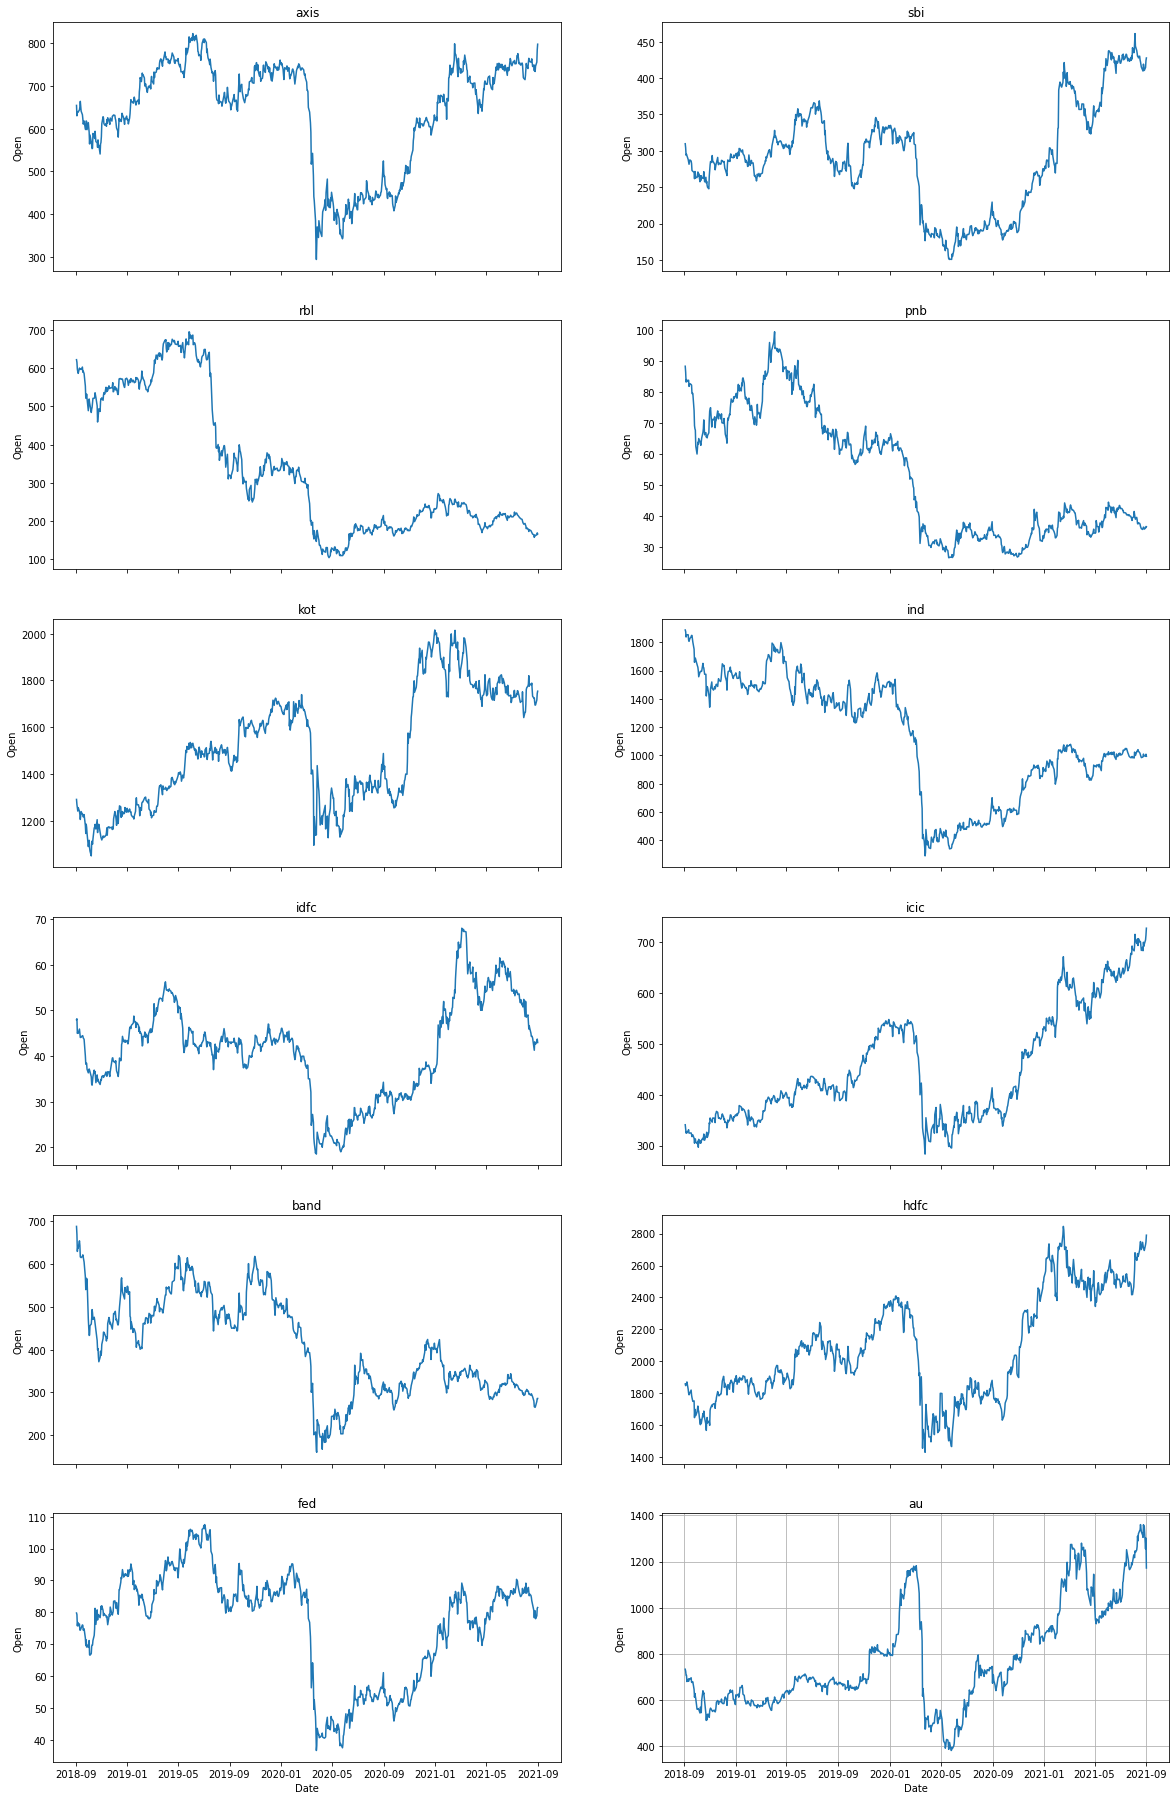

In [8]:
fig, axes = plt.subplots(6, 2, sharex=True, figsize=(20,32))
plt.grid(True)
sns.lineplot(ax=axes[0, 0], data=df_axis, x='Date', y='Open')
axes[0,0].set_title('axis')
sns.lineplot(ax=axes[0, 1], data=df_sbi, x='Date', y='Open')
axes[0,1].set_title('sbi')
sns.lineplot(ax=axes[1, 0], data=df_rbl, x='Date', y='Open')
axes[1,0].set_title('rbl')
sns.lineplot(ax=axes[1, 1], data=df_pnb, x='Date', y='Open')
axes[1,1].set_title('pnb')
sns.lineplot(ax=axes[2, 0], data=df_kot, x='Date', y='Open')
axes[2,0].set_title('kot')
sns.lineplot(ax=axes[2, 1], data=df_ind, x='Date', y='Open')
axes[2,1].set_title('ind')
sns.lineplot(ax=axes[3, 0], data=df_idfc, x='Date', y='Open')
axes[3,0].set_title('idfc')
sns.lineplot(ax=axes[3, 1], data=df_icic, x='Date', y='Open')
axes[3,1].set_title('icic')
sns.lineplot(ax=axes[4, 0], data=df_band, x='Date', y='Open')
axes[4,0].set_title('band')
sns.lineplot(ax=axes[4, 1], data=df_hdfc, x='Date', y='Open')
axes[4,1].set_title('hdfc')
sns.lineplot(ax=axes[5, 0], data=df_fed, x='Date', y='Open')
axes[5,0].set_title('fed')
sns.lineplot(ax=axes[5,1], data=df_au, x='Date', y='Open')
axes[5,1].set_title('au')

# Data Preprocessing

In [9]:
print(df.shape)
date_train=pd.to_datetime(df['Date'])
date_train

(733, 8)


0     2018-09-03
1     2018-09-04
2     2018-09-05
3     2018-09-06
4     2018-09-07
         ...    
728   2021-08-26
729   2021-08-27
730   2021-08-30
731   2021-08-31
732   2021-09-01
Name: Date, Length: 733, dtype: datetime64[ns]

In [10]:
Scale=StandardScaler()
def data_prep(df, lookback, future, Scale):
    date_train=pd.to_datetime(df['Date'])
    df_train=df[['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
    df_train=df_train.astype(float)
    
    df_train_scaled=Scale.fit_transform(df_train)

    X, y =[],[]
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i+future-1:i+future, 0])
        
    return np.array(X), np.array(y), df_train, date_train

Lstm_x, Lstm_y, df_train, date_train = data_prep(df, 30, 1, Scale)

# LSTM

LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

Long-Short-Term Memory Recurrent Neural Network belongs to the family of deep learning algorithms. It is a recurrent network because of the feedback connections in its architecture. It has an advantage over traditional neural networks due to its capability to process the entire sequence of data. Its architecture comprises the cell, input gate, output gate and forget gate.

The input gate: The input gate adds information to the cell state,
The forget gate: It removes the information that is no longer required by the model,
The output gate: Output Gate at LSTM selects the information to be shown as output.

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [11]:
def Lstm_fallback(X,y):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu',input_shape=(X.shape[1], X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y.shape[1], activation='relu'))

    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  
    model.compile(
            loss='mse',
            optimizer=opt,
        )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)
    return model



In [12]:
def Lstm_model1(X, y):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [13]:
def Lstm_model2(X,y):
    model=Sequential()
    
    model.add(LSTM(20,return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #model.add(LSTM(15,return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(15))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y,validation_split=0.2,epochs=100,batch_size=64,verbose=1, callbacks=[es])
    return model

# Prediction

In [14]:
def predict_open(model,date_train,Lstm_x,df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted=model.predict(Lstm_x[-future:])
    predicted1=np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled=Scale.inverse_transform(predicted1)[:,0]
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates,predicted_descaled):
    dates=[]
    for i in forecasting_dates:
        dates.append(i.date())
    df_final=pd.DataFrame(columns=['Date','Open'])
    df_final['Date']=pd.to_datetime(dates)
    df_final['Open']=predicted_descaled
    return df_final

In [15]:
def results(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

In [16]:
def results1(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model2(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()


# Result Visualization

Epoch 1/100
10/10 [==============================] - 13s 229ms/step - loss: 0.6102 - val_loss: 0.0876
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2049 - val_loss: 0.2838
Epoch 3/100
10/10 [==============================] - 0s 21ms/step - loss: 0.1357 - val_loss: 0.0722
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.1087 - val_loss: 0.0750
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0970 - val_loss: 0.0709
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0877 - val_loss: 0.0242
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0715 - val_loss: 0.0363
Epoch 8/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0743 - val_loss: 0.0638
Epoch 9/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0740 - val_loss: 0.0166
Epoch 10/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0629 - val_loss: 0.05

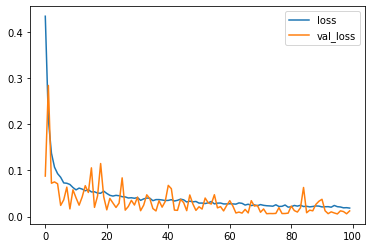

In [17]:
results(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
9/9 [==============================] - 3s 102ms/step - loss: 1.5274 - val_loss: 1.5652
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5448 - val_loss: 1.7257
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2842 - val_loss: 1.7352
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2105 - val_loss: 1.6516
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1753 - val_loss: 1.5600
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1613 - val_loss: 1.5399
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1506 - val_loss: 1.5142
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1584 - val_loss: 1.4996
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1309 - val_loss: 1.4695
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1423 - val_loss: 1.4728
Epoch 11/100
9/9 [

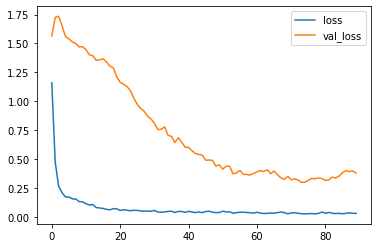

In [18]:
results1(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
9/9 [==============================] - 4s 98ms/step - loss: 1.7115 - val_loss: 0.5898
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6536 - val_loss: 0.5094
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3430 - val_loss: 0.4508
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2584 - val_loss: 0.4369
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2205 - val_loss: 0.4214
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1743 - val_loss: 0.4112
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1729 - val_loss: 0.3918
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1628 - val_loss: 0.3753
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1515 - val_loss: 0.3600
Epoch 10/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1473 - val_loss: 0.3374
Epoch 11/100
9/9 [=

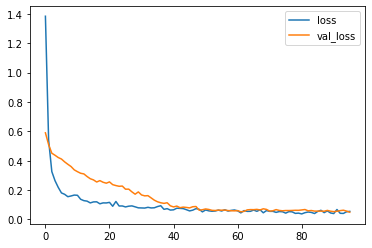

Epoch 1/100
9/9 [==============================] - 3s 106ms/step - loss: 1.5519 - val_loss: 1.9068
Epoch 2/100
9/9 [==============================] - 0s 20ms/step - loss: 0.9440 - val_loss: 2.1435
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6192 - val_loss: 2.2505
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.4883 - val_loss: 2.3195
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4589 - val_loss: 2.2891
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3732 - val_loss: 2.1958
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2897 - val_loss: 2.2103
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2295 - val_loss: 2.3526
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1906 - val_loss: 2.5597
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1783 - val_loss: 2.5485
Epoch 11/100
9/9 [

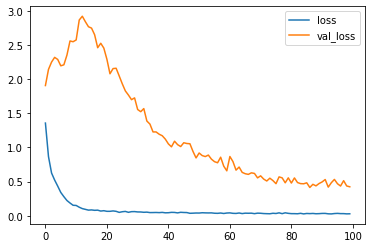

Epoch 1/100
9/9 [==============================] - 3s 103ms/step - loss: 0.3814 - val_loss: 0.4865
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2475 - val_loss: 0.4543
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1552 - val_loss: 0.4076
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1646 - val_loss: 0.3940
Epoch 5/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1298 - val_loss: 0.3742
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.1219 - val_loss: 0.3588
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1111 - val_loss: 0.3427
Epoch 8/100
9/9 [==============================] - 0s 22ms/step - loss: 0.1085 - val_loss: 0.3369
Epoch 9/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1145 - val_loss: 0.3187
Epoch 10/100
9/9 [==============================] - 0s 22ms/step - loss: 0.1087 - val_loss: 0.3202
Epoch 11/100
9/9 [

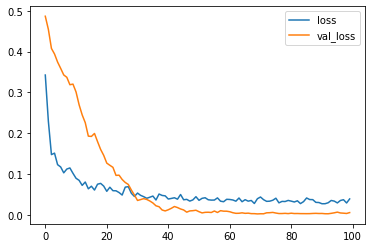

Epoch 1/100
9/9 [==============================] - 4s 102ms/step - loss: 0.5519 - val_loss: 0.4182
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2459 - val_loss: 0.4068
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1842 - val_loss: 0.4041
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2363 - val_loss: 0.4183
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1474 - val_loss: 0.3911
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1881 - val_loss: 0.3801
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1217 - val_loss: 0.3780
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1211 - val_loss: 0.3696
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1019 - val_loss: 0.3598
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0976 - val_loss: 0.3454
Epoch 11/100
9/9 [

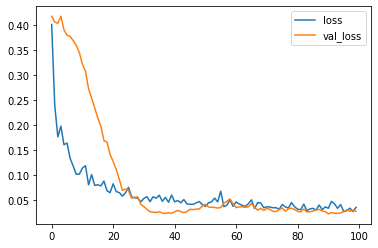

Epoch 1/100
9/9 [==============================] - 3s 103ms/step - loss: 1.4406 - val_loss: 1.4130
Epoch 2/100
9/9 [==============================] - 0s 27ms/step - loss: 0.4408 - val_loss: 1.0296
Epoch 3/100
9/9 [==============================] - 0s 29ms/step - loss: 0.2931 - val_loss: 0.9283
Epoch 4/100
9/9 [==============================] - 0s 28ms/step - loss: 0.2013 - val_loss: 1.0773
Epoch 5/100
9/9 [==============================] - 0s 25ms/step - loss: 0.2031 - val_loss: 1.1641
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1786 - val_loss: 1.0718
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1810 - val_loss: 0.9886
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1887 - val_loss: 1.0102
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1459 - val_loss: 1.0056
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1436 - val_loss: 0.9966
Epoch 11/100
9/9 [

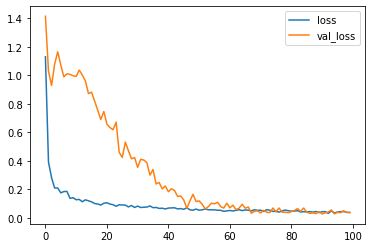

Epoch 1/100
9/9 [==============================] - 3s 102ms/step - loss: 1.3110 - val_loss: 0.1144
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.8174 - val_loss: 0.0869
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6217 - val_loss: 0.0659
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4868 - val_loss: 0.0506
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3655 - val_loss: 0.0396
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2774 - val_loss: 0.0307
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1999 - val_loss: 0.0259
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1738 - val_loss: 0.0220
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1376 - val_loss: 0.0183
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1109 - val_loss: 0.0148
Epoch 11/100
9/9 [

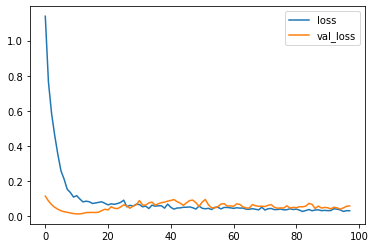

Epoch 1/100
9/9 [==============================] - 4s 102ms/step - loss: 1.3487 - val_loss: 1.6861
Epoch 2/100
9/9 [==============================] - 0s 20ms/step - loss: 0.5426 - val_loss: 1.5118
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3603 - val_loss: 1.4030
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3475 - val_loss: 1.3266
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3047 - val_loss: 1.2723
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2477 - val_loss: 1.2118
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2243 - val_loss: 1.1609
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2208 - val_loss: 1.1009
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2158 - val_loss: 1.0736
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1695 - val_loss: 1.0363
Epoch 11/100
9/9 [

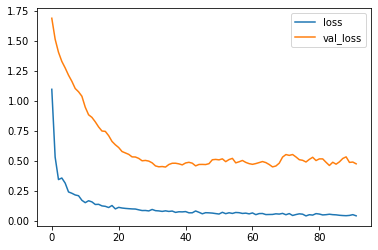

Epoch 1/100
9/9 [==============================] - 4s 103ms/step - loss: 0.6502 - val_loss: 2.2476
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3854 - val_loss: 2.3121
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2615 - val_loss: 2.3763
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2457 - val_loss: 2.3982
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1624 - val_loss: 2.3329
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1471 - val_loss: 2.1707
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1386 - val_loss: 2.1701
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1424 - val_loss: 2.2000
Epoch 9/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1118 - val_loss: 2.2115
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1127 - val_loss: 2.1004
Epoch 11/100
9/9 [

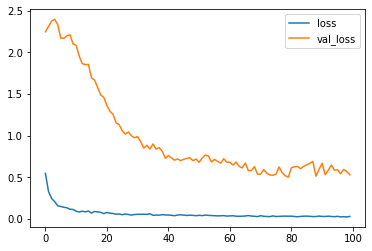

Epoch 1/100
9/9 [==============================] - 3s 110ms/step - loss: 0.5097 - val_loss: 0.4919
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2610 - val_loss: 0.4945
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 0.2553 - val_loss: 0.5213
Epoch 4/100
9/9 [==============================] - 0s 18ms/step - loss: 0.2678 - val_loss: 0.5269
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1826 - val_loss: 0.4882
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1709 - val_loss: 0.5230
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1555 - val_loss: 0.5070
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1316 - val_loss: 0.4797
Epoch 9/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1839 - val_loss: 0.4804
Epoch 10/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1376 - val_loss: 0.4138
Epoch 11/100
9/9 [

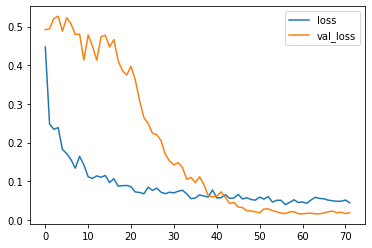

Epoch 1/100
9/9 [==============================] - 4s 127ms/step - loss: 0.4512 - val_loss: 2.0329
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2656 - val_loss: 2.0183
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.2253 - val_loss: 2.0703
Epoch 4/100
9/9 [==============================] - 0s 23ms/step - loss: 0.1883 - val_loss: 2.1001
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1603 - val_loss: 2.0665
Epoch 6/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1282 - val_loss: 2.0183
Epoch 7/100
9/9 [==============================] - 0s 30ms/step - loss: 0.1411 - val_loss: 1.9515
Epoch 8/100
9/9 [==============================] - 0s 27ms/step - loss: 0.1168 - val_loss: 1.9224
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1015 - val_loss: 1.9176
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1209 - val_loss: 1.8449
Epoch 11/100
9/9 [

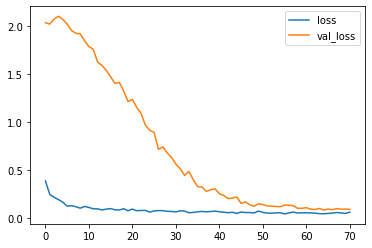

Epoch 1/100
9/9 [==============================] - 3s 101ms/step - loss: 2.6200 - val_loss: 0.2948
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 1.0207 - val_loss: 0.2274
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5292 - val_loss: 0.1845
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3057 - val_loss: 0.1586
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2618 - val_loss: 0.1446
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2314 - val_loss: 0.1476
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2231 - val_loss: 0.1453
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2067 - val_loss: 0.1366
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1977 - val_loss: 0.1339
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2049 - val_loss: 0.1301
Epoch 11/100
9/9 [

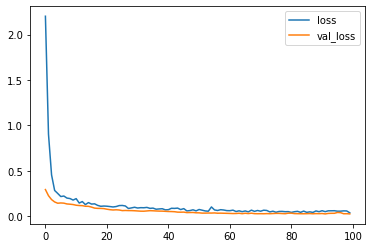

Epoch 1/100
9/9 [==============================] - 3s 102ms/step - loss: 1.2934 - val_loss: 2.6154
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5529 - val_loss: 2.7302
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3913 - val_loss: 2.7439
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2534 - val_loss: 2.7412
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2370 - val_loss: 2.7906
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2233 - val_loss: 2.7166
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1699 - val_loss: 2.5849
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.1644 - val_loss: 2.5604
Epoch 9/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1614 - val_loss: 2.6079
Epoch 10/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1323 - val_loss: 2.4933
Epoch 11/100
9/9 [

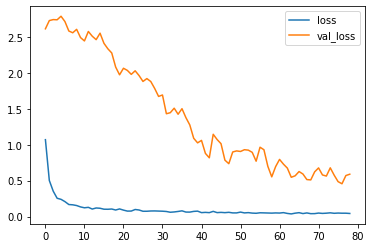

In [19]:
d={'AXIS':df_axis, 'SBI':df_sbi, 'RBL': df_rbl ,'PNB': df_pnb ,'KOTAK': df_kot, 
   'INDUSIND':df_ind, 'IDFC': df_idfc, 'ICIC': df_icic , 'BANDHAN': df_band, 'HDFC': df_hdfc, 'FEDERAL': df_fed,
   'AU FIN':df_au}

for x in d.keys():
    results1(d[x], 30, 1, Scale, x)
    